Задание 2 (12.7) Вариант 1


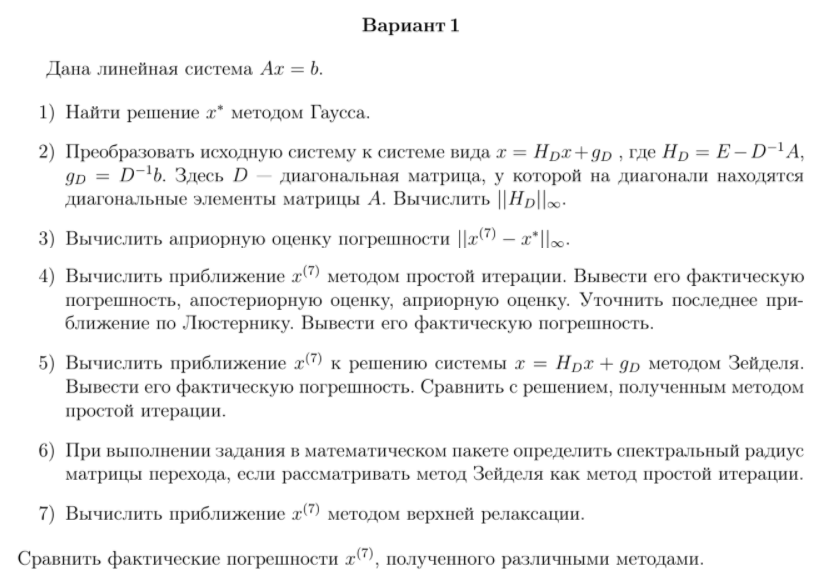

Вариант расширенной матрицы (11.6) - 5

In [6]:
import numpy as np


# Функция, распечатывающая массив
def print_matrix(matrix):
    print_mat = np.array(matrix)
    print(print_mat)


# Функция, распечатывающая строчку
def print_row(row):
    print("[", end=' ')
    for i in range(len(row)):
        print(row[i], end=' ')
    print("]", end=' ')
    print()


# Метод гаусса с выбором главного элемента по столбцу
def gauss_method_main_element(matrix, eps):
    # Прямой ход
    for k in range(len(matrix)):

        max_line = k
        max_abs_num = 0

        # Поиск главного элемента по стобцу
        for j in range(k, len(matrix)):
            if max_abs_num < abs(matrix[k][j]):
                max_abs_num = matrix[k][j]
                max_line = j

        # Перестановка строк
        matrix[k], matrix[max_line] = matrix[max_line], matrix[k]

        # Рассматриваем случай, когда главный элемент не равен 0
        if abs(matrix[k][k]) > eps:

            # Преобразование главного элемента в диагонали к еденице
            matrix[k] = [num / matrix[k][k] for num in matrix[k]]

            # Преобразование текущего столбца к 0 (помимо главного элемента)
            for i in range(k + 1, len(matrix)):
                weight = matrix[i][k]
                matrix[i] = [((num - t * weight) if (abs(num - t * weight) > eps) else 0) for num, t in zip(matrix[i],
                                                                                                            matrix[k])]

    x_values = [0] * len(matrix)

    # Обратный ход
    for i in range(len(matrix) - 1, -1, -1):
        temp = 0
        for j in range(i + 1, len(matrix)):
            temp += matrix[i][j] * x_values[j]
        x_values[i] = matrix[i][len(matrix)] - temp

    return x_values


# Приведение исходной СЛАУ к системе вида x = Hx + g
def coercion_to_hxg(matrix):
    h_matrix = [[0] * len(matrix) for i in range(len(matrix))]
    g_column = [0] * len(matrix)

    for i in range(len(matrix)):
        g_column[i] = matrix[i][len(matrix)] / matrix[i][i]

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j:
                h_matrix[i][j] = - matrix[i][j] / matrix[i][i]

    print("Матрица H:")
    print_matrix(h_matrix)
    print("\nСтолбец g:")
    print_row(g_column)

    h_matrix_norm = 0
    temp = 0

    for i in range(len(h_matrix)):
        for j in range(len(h_matrix)):
            temp += abs(h_matrix[i][j])
        if temp > h_matrix_norm:
            h_matrix_norm = temp
        temp = 0

    return [h_matrix, g_column, h_matrix_norm]


# Вычисление априорной оценки для x^(n)
def prior_estimate(norm_matrix_h, g_column, n):
    # Пусть нулевое приближение - нулевой столбец
    null_norm = 0
    g_norm = 0
    for i in range(len(g_column)):
        if g_norm < abs(g_column[i]):
            g_norm = abs(g_column[i])

    return norm_matrix_h ** n * null_norm + norm_matrix_h ** n / (1 - norm_matrix_h) * g_norm


# Метод простой итерации для x^(n)
def simple_iteration_method(h_matrix, g_column, n):
    x_solve = [0] * len(g_column)
    x_temp = [0] * len(g_column)
    for k in range(n):
        for i in range(len(g_column)):
            temp = 0
            for j in range(len(h_matrix)):
                temp += h_matrix[i][j] * x_solve[j]
            temp += g_column[i]
            x_temp[i] = temp
        x_solve = x_temp

    return x_solve


# Норма разности двух векторов 00(беск.)
def vector_difference_norm(x1, x2):
    temp = 0
    for i in range(len(x2)):
        if abs(x1[i] - x2[i]):
            temp = abs(x1[i] - x2[i])
    return temp


# Метод Люстерника
def lust_method(x1, x2, ph):
    temp = 1 / (1 - ph)
    x_temp = [0] * len(x1)
    for i in range(len(x1)):
        x_temp[i] = (x1[i] - x2[i]) * temp + x2[i]
    return x_temp


# Метод Зейделя
def seidel_method(h_matrix, g_column, n):
    h_R_matrix = [[0] * len(h_matrix) for i in range(len(h_matrix))]
    h_L_matrix = [[0] * len(h_matrix) for i in range(len(h_matrix))]
    for i in range(len(h_matrix)):
        for j in range(len(h_matrix)):
            if i > j:
                h_L_matrix[i][j] = h_matrix[i][j]
            else:
                h_R_matrix[i][j] = h_matrix[i][j]
    for i in range(len(h_matrix)):
        for j in range(len(h_matrix)):
            if i == j:
                h_L_matrix[i][j] = 1
            if i > j:
                h_L_matrix[i][j] = 0 - h_L_matrix[i][j]

    h_temp_matrix = np.matrix([np.array(xi) for xi in h_L_matrix])
    h_temp_matrix_inv = np.linalg.inv(h_temp_matrix)

    h_R_matrix_np = np.matrix([np.array(xi) for xi in h_R_matrix])
    E_L_R_matrix = h_temp_matrix_inv * h_R_matrix_np
    E_L_G_col = h_temp_matrix_inv * np.matrix(g_column).transpose()

    x_current = np.matrix('0; 0; 0')

    for i in range(n):
        x_current = E_L_R_matrix * x_current + E_L_G_col
    x_solve = x_current.tolist()
    return [x_solve[0][0], x_solve[1][0], x_solve[2][0]]


# Метод верхней релаксации
def upper_relaxation_method(h_matrix, g_column, n):
    q = 2 / (1 + (1 - p_h ** 2) ** (1 / 2))
    x_solve_temp = [0] * len(g_column)
    x_solve = [0] * len(g_column)
    for k in range(n):
        for i in range(len(h_matrix)):
            temp1 = 0
            temp2 = 0
            for j in range(i):
                temp1 += h_matrix[i][j] * x_solve[j]
            for j in range(i + 1, len(g_column)):
                temp2 += h_matrix[i][j] * x_solve_temp[j]
            x_solve[i] = x_solve_temp[i] + q * (temp1 + temp2 - x_solve_temp[i] + g_column[i])
        x_solve_temp = x_solve
        x_solve = [0] * len(g_column)
    return x_solve_temp

epsilon = 1e-9
test_matrix = np.array([[8.673134, 1.041039, -2.677712, -1.289879], [1.041039, 6.586211, 0.623016, 4.020225], [-2.677712, 0.623016, 5.225935, 5.269671]])

print("Исходная матрица:")
print_matrix(test_matrix)
x = gauss_method_main_element(test_matrix.copy(), epsilon)
print("\nПункт 1:")
print("Решение СЛАУ при помощи метода Гаусса :")
print_row(x)

print("\nПункт 2:")
h_norm = coercion_to_hxg(test_matrix.copy())
print(f"\nНорма 00(беск.) матрицы H: {h_norm[2]}")

print("\nПункт 3:")
prior_est = prior_estimate(h_norm[2], h_norm[1], 7)
print(f"||x^(7) - x||_00 <= {prior_est}")

print("\nПункт 4:")
x_7 = simple_iteration_method(h_norm[0], h_norm[1], 7)
print("x^(7) вычисленное методом простой итерации:")
print_row(x_7)

print(f"Фактическая погрешность для решения x^(7): {vector_difference_norm(x_7, x)}")
print(f"Априорная погрешность для решения x^(7): {prior_est}")
x_6 = simple_iteration_method(h_norm[0], h_norm[1], 6)
print(f"Апостериорная погрешность для решения x^(7): {h_norm[2] / (1 - h_norm[2]) * vector_difference_norm(x_6, x_7)}")

# Нахождение спектрального радиуса матрицы H
h_test = np.matrix([np.array(xi) for xi in h_norm[0]])
wa, va = np.linalg.eig(h_test)
print(wa)
wa = np.absolute(wa)
print(np.amax(wa))

p_h = np.amax(wa)  # Спектральный радиус матрицы H
x_7_lust = lust_method(x_7, x_6, p_h)
print("Улучшенное по Люстернику x^(7):")
print_row(x_7_lust)
print(f"Фактическая погрешность для этого решения: {vector_difference_norm(x, x_7_lust)}")

print("\nПункт 5:")

print("Метод Зейделя")
x_7_seidel = seidel_method(h_norm[0], h_norm[1], 7)
print(x_7_seidel)
print(f"Фактическая погрешность для этого решения: {vector_difference_norm(x, x_7_seidel)}")

print("\nПункт 6:")
print(f"Спектральный радиус матрицы H: {p_h}")

print("\nПункт 7:")
print("Метод верхней релаксации")
x_7_upper = upper_relaxation_method(h_norm[0], h_norm[1], 7)
print(x_7_upper)
print(f"Фактическая погрешность для этого решения: {vector_difference_norm(x, x_7_upper)}")

print("\nИтог, для x^(7), фактические погрешности:")
print(f"Простоя итерация: {vector_difference_norm(x_7, x)}")
print(f"Простоя итерация + Люстерик: {vector_difference_norm(x_7_lust, x)}")
print(f"Зейдель: {vector_difference_norm(x_7_seidel, x)}")
print(f"Верхняя релаксация: {vector_difference_norm(x_7_upper, x)}")

Исходная матрица:
[[ 8.673134  1.041039 -2.677712 -1.289879]
 [ 1.041039  6.586211  0.623016  4.020225]
 [-2.677712  0.623016  5.225935  5.269671]]

Пункт 1:
Решение СЛАУ при помощи метода Гаусса :
[ 0.09999996490242125 0.4999999605516743 0.9999998336366086 ] 

Пункт 2:
Матрица H:
[[ 0.         -0.12003031  0.30873638]
 [-0.15806341  0.         -0.09459399]
 [ 0.51238907 -0.11921618  0.        ]]

Столбец g:
[ -0.14872121196328802 0.6104002741485203 1.0083690287001272 ] 

Норма 00(беск.) матрицы H: 0.6316052534139824

Пункт 3:
||x^(7) - x||_00 <= 0.10975547790337321

Пункт 4:
x^(7) вычисленное методом простой итерации:
[ 0.09999550097605311 0.5000017376676693 0.9999973345085287 ] 
Фактическая погрешность для решения x^(7): 2.499128079924695e-06
Априорная погрешность для решения x^(7): 0.10975547790337321
Апостериорная погрешность для решения x^(7): 1.5136408979172513e-05
[ 0.46218771 -0.39911044 -0.06307727]
0.4621877113822007
Улучшенное по Люстернику x^(7):
[ 0.10000905341220567 0.499

*Работу выполнил Пашов Павел, группа 323.*